In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import glob
import os

In [11]:
def get_endings(image):
    b, g, r = cv2.split(image)
    binary_image = np.where(g == 255, 255, 0).astype(np.uint8)

    binary_image = cv2.dilate(binary_image, np.ones((5, 5), np.uint8) , iterations=1)
    binary_image = cv2.erode(binary_image, np.ones((3, 3), np.uint8) , iterations=1)
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours1 = max(contours, key=lambda x: cv2.contourArea(x))
    # cv2.drawContours(image, [contours1], -1, (255,255,0), 2)
    
    # x, y, w, h = cv2.boundingRect(contours1)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 0)
    hull = cv2.convexHull(contours1)
    # cv2.drawContours(image, [hull], 0, (0, 0, 255), 2)
    endings_points = []
    for h in hull:
        # print('ending', h[0])
        endings_points.append(h[0])
        cv2.circle(image, h[0], 5, [255, 0, 0], -1)
    
    return endings_points, image


[array([342,  18], dtype=int32), array([463,  39], dtype=int32), array([470,  47], dtype=int32), array([477,  73], dtype=int32), array([477,  75], dtype=int32), array([475,  77], dtype=int32), array([421, 127], dtype=int32), array([365, 177], dtype=int32), array([108, 226], dtype=int32), array([ 92, 229], dtype=int32), array([ 27, 241], dtype=int32), array([ 25, 241], dtype=int32), array([ 25, 239], dtype=int32), array([179,  33], dtype=int32), array([338,  18], dtype=int32)]


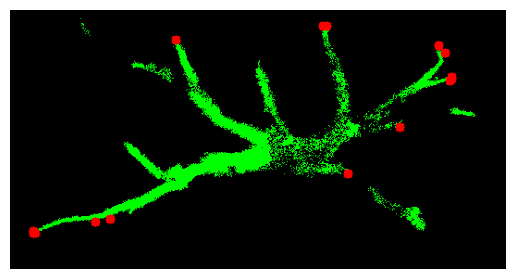

[array([145,  39], dtype=int32), array([148,  41], dtype=int32), array([150,  43], dtype=int32), array([192, 112], dtype=int32), array([192, 117], dtype=int32), array([186, 128], dtype=int32), array([181, 128], dtype=int32), array([176, 127], dtype=int32), array([ 80, 105], dtype=int32), array([40, 87], dtype=int32), array([37, 85], dtype=int32), array([30, 79], dtype=int32), array([30, 73], dtype=int32), array([31, 72], dtype=int32), array([36, 69], dtype=int32), array([143,  39], dtype=int32)]


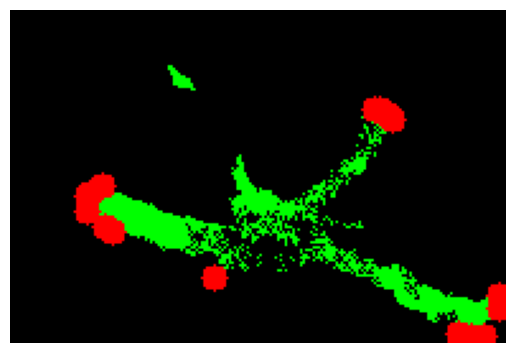

[array([222,  50], dtype=int32), array([242,  60], dtype=int32), array([362, 162], dtype=int32), array([362, 164], dtype=int32), array([360, 165], dtype=int32), array([317, 177], dtype=int32), array([134, 197], dtype=int32), array([ 76, 201], dtype=int32), array([ 73, 201], dtype=int32), array([ 27, 166], dtype=int32), array([ 27, 164], dtype=int32), array([103,  88], dtype=int32), array([107,  86], dtype=int32), array([220,  50], dtype=int32)]


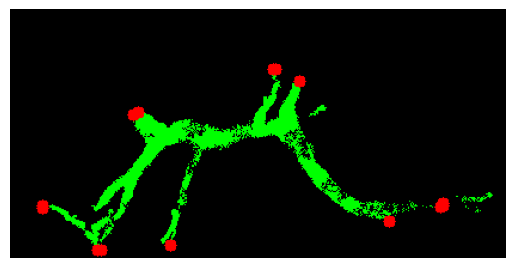

[array([106,  55], dtype=int32), array([197,  67], dtype=int32), array([202,  68], dtype=int32), array([204,  69], dtype=int32), array([452, 205], dtype=int32), array([453, 207], dtype=int32), array([453, 209], dtype=int32), array([310, 335], dtype=int32), array([308, 335], dtype=int32), array([174, 288], dtype=int32), array([160, 282], dtype=int32), array([ 33, 207], dtype=int32), array([  4, 171], dtype=int32), array([  4, 169], dtype=int32), array([  6, 163], dtype=int32), array([95, 58], dtype=int32), array([99, 56], dtype=int32), array([104,  55], dtype=int32)]


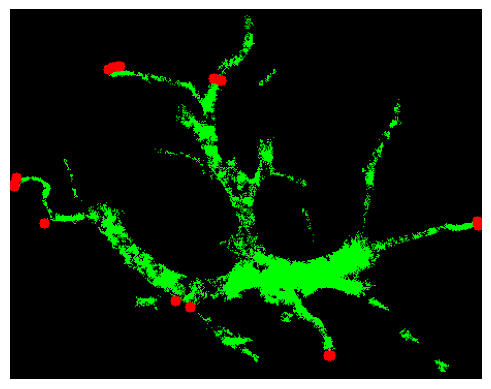

[array([202,  31], dtype=int32), array([206,  34], dtype=int32), array([222,  53], dtype=int32), array([256, 174], dtype=int32), array([256, 177], dtype=int32), array([255, 185], dtype=int32), array([147, 310], dtype=int32), array([142, 315], dtype=int32), array([137, 318], dtype=int32), array([135, 318], dtype=int32), array([133, 316], dtype=int32), array([19, 66], dtype=int32), array([18, 62], dtype=int32), array([18, 60], dtype=int32), array([200,  31], dtype=int32)]


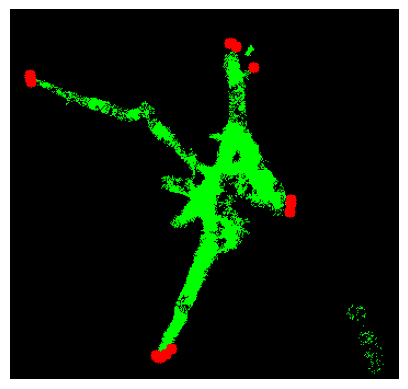

[array([114,  55], dtype=int32), array([131,  58], dtype=int32), array([132,  59], dtype=int32), array([193, 137], dtype=int32), array([195, 141], dtype=int32), array([197, 146], dtype=int32), array([197, 150], dtype=int32), array([188, 167], dtype=int32), array([183, 172], dtype=int32), array([132, 184], dtype=int32), array([127, 184], dtype=int32), array([ 65, 170], dtype=int32), array([ 59, 168], dtype=int32), array([ 56, 166], dtype=int32), array([ 54, 163], dtype=int32), array([ 52, 156], dtype=int32), array([ 52, 154], dtype=int32), array([107,  61], dtype=int32), array([112,  55], dtype=int32)]


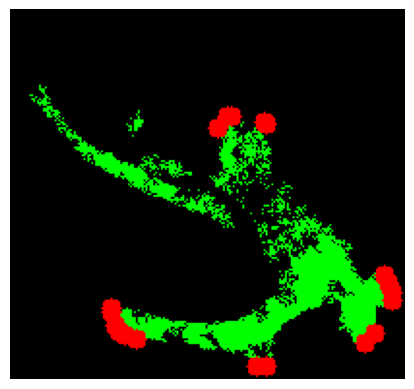

[array([112,  13], dtype=int32), array([207,  54], dtype=int32), array([214,  62], dtype=int32), array([214,  64], dtype=int32), array([168, 233], dtype=int32), array([124, 249], dtype=int32), array([ 35, 261], dtype=int32), array([ 27, 262], dtype=int32), array([ 25, 262], dtype=int32), array([ 15, 239], dtype=int32), array([ 15, 237], dtype=int32), array([99, 23], dtype=int32), array([101,  20], dtype=int32), array([102,  19], dtype=int32), array([110,  13], dtype=int32)]


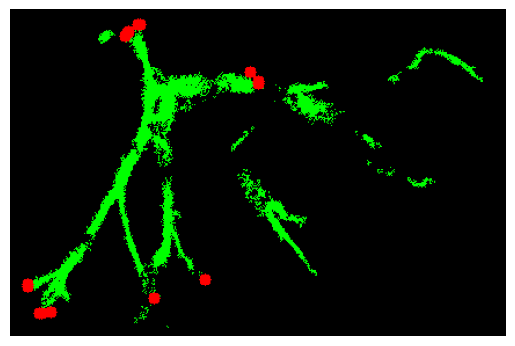

[array([234,  23], dtype=int32), array([427,  55], dtype=int32), array([476,  66], dtype=int32), array([476,  68], dtype=int32), array([305, 171], dtype=int32), array([299, 171], dtype=int32), array([ 74, 151], dtype=int32), array([ 74, 149], dtype=int32), array([ 76, 145], dtype=int32), array([173,  43], dtype=int32), array([178,  39], dtype=int32), array([232,  23], dtype=int32)]


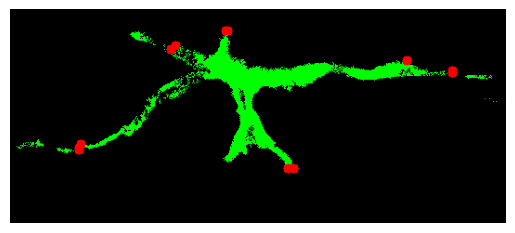

[array([177,  21], dtype=int32), array([178,  23], dtype=int32), array([180,  28], dtype=int32), array([220, 165], dtype=int32), array([220, 167], dtype=int32), array([191, 256], dtype=int32), array([174, 295], dtype=int32), array([119, 382], dtype=int32), array([116, 386], dtype=int32), array([114, 386], dtype=int32), array([ 24, 300], dtype=int32), array([  4, 265], dtype=int32), array([  4, 260], dtype=int32), array([174,  22], dtype=int32), array([175,  21], dtype=int32)]


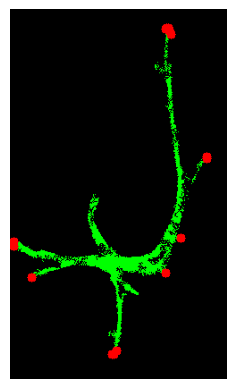

[array([ 11, 138], dtype=int32), array([ 56, 160], dtype=int32), array([ 98, 191], dtype=int32), array([ 99, 192], dtype=int32), array([100, 195], dtype=int32), array([100, 200], dtype=int32), array([ 81, 224], dtype=int32), array([ 74, 228], dtype=int32), array([ 39, 237], dtype=int32), array([ 18, 240], dtype=int32), array([  6, 240], dtype=int32), array([  6, 238], dtype=int32), array([  7, 138], dtype=int32)]


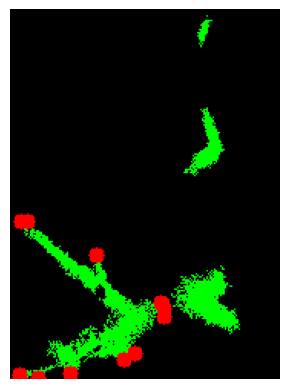

In [12]:
thin_dir = 'Lipachev_2024.03.16_astrocytes_examples/Lipachev_2024.02.27_astrocytes-test-thin'
for file in glob.glob(os.path.join(thin_dir, '*.tif')):
    img = cv2.imread(file)
    endings_points, img_endings = get_endings(img)
    print(endings_points)
    plt.imshow(img_endings)
    plt.axis('off')
    plt.show()

[array([26, 19], dtype=int32), array([29, 20], dtype=int32), array([200, 133], dtype=int32), array([209, 142], dtype=int32), array([300, 270], dtype=int32), array([301, 276], dtype=int32), array([301, 280], dtype=int32), array([297, 285], dtype=int32), array([291, 289], dtype=int32), array([228, 313], dtype=int32), array([149, 326], dtype=int32), array([ 31, 337], dtype=int32), array([ 26, 337], dtype=int32), array([ 24, 336], dtype=int32), array([ 23, 335], dtype=int32), array([ 22, 331], dtype=int32), array([ 20, 315], dtype=int32), array([ 14, 240], dtype=int32), array([ 14, 183], dtype=int32), array([15, 19], dtype=int32)]


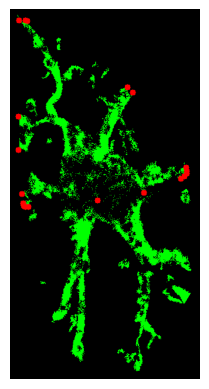

[array([193,  13], dtype=int32), array([207,  19], dtype=int32), array([230,  29], dtype=int32), array([231,  30], dtype=int32), array([235,  36], dtype=int32), array([245,  58], dtype=int32), array([299, 203], dtype=int32), array([313, 243], dtype=int32), array([313, 250], dtype=int32), array([312, 252], dtype=int32), array([167, 384], dtype=int32), array([162, 388], dtype=int32), array([160, 389], dtype=int32), array([141, 394], dtype=int32), array([137, 394], dtype=int32), array([136, 393], dtype=int32), array([135, 391], dtype=int32), array([130, 380], dtype=int32), array([ 51, 188], dtype=int32), array([ 51, 184], dtype=int32), array([ 57, 151], dtype=int32), array([109,  95], dtype=int32), array([188,  13], dtype=int32)]


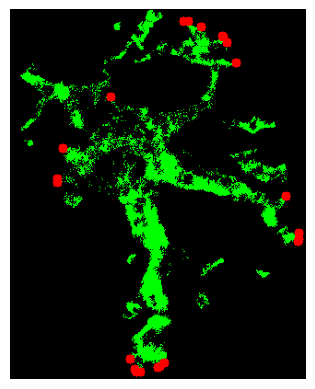

[array([105,   0], dtype=int32), array([290,   6], dtype=int32), array([294,  13], dtype=int32), array([347, 109], dtype=int32), array([359, 132], dtype=int32), array([360, 135], dtype=int32), array([380, 230], dtype=int32), array([380, 234], dtype=int32), array([379, 236], dtype=int32), array([377, 238], dtype=int32), array([361, 248], dtype=int32), array([357, 249], dtype=int32), array([242, 260], dtype=int32), array([ 24, 275], dtype=int32), array([  1, 275], dtype=int32), array([  0, 274], dtype=int32), array([  0, 266], dtype=int32), array([  3, 257], dtype=int32), array([93,  2], dtype=int32), array([94,  0], dtype=int32)]


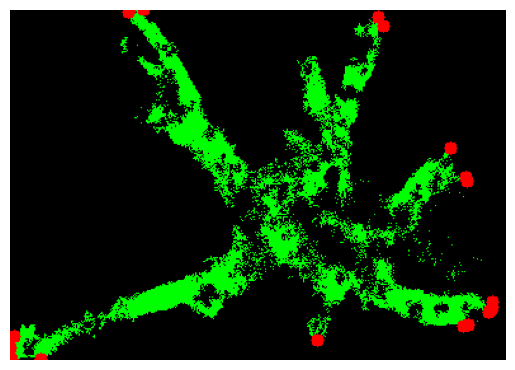

[array([547,  10], dtype=int32), array([549,  11], dtype=int32), array([606, 316], dtype=int32), array([609, 333], dtype=int32), array([609, 337], dtype=int32), array([585, 387], dtype=int32), array([501, 461], dtype=int32), array([499, 462], dtype=int32), array([437, 480], dtype=int32), array([399, 480], dtype=int32), array([180, 386], dtype=int32), array([171, 382], dtype=int32), array([  5, 307], dtype=int32), array([  3, 306], dtype=int32), array([  2, 305], dtype=int32), array([  1, 302], dtype=int32), array([  1, 298], dtype=int32), array([  3, 296], dtype=int32), array([125, 180], dtype=int32), array([127, 179], dtype=int32), array([434,  52], dtype=int32), array([542,  10], dtype=int32)]


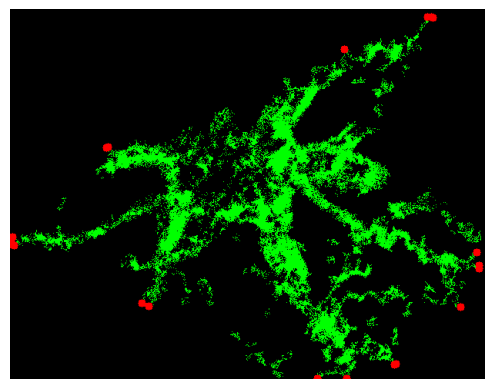

[array([247,   0], dtype=int32), array([535, 143], dtype=int32), array([537, 144], dtype=int32), array([541, 148], dtype=int32), array([542, 151], dtype=int32), array([542, 156], dtype=int32), array([285, 439], dtype=int32), array([284, 440], dtype=int32), array([249, 469], dtype=int32), array([108, 506], dtype=int32), array([103, 506], dtype=int32), array([ 90, 505], dtype=int32), array([ 69, 500], dtype=int32), array([  6, 473], dtype=int32), array([  4, 472], dtype=int32), array([  1, 445], dtype=int32), array([  1, 425], dtype=int32), array([29, 70], dtype=int32), array([34, 56], dtype=int32), array([36, 54], dtype=int32), array([38, 53], dtype=int32), array([190,   1], dtype=int32), array([193,   0], dtype=int32)]


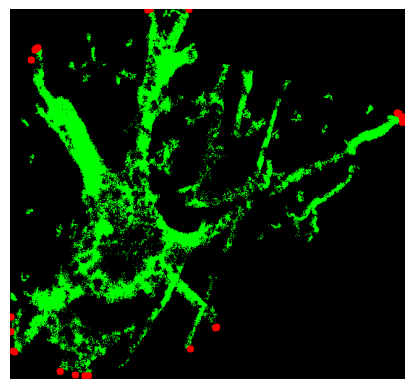

[array([193,   0], dtype=int32), array([225,  16], dtype=int32), array([249,  30], dtype=int32), array([262,  38], dtype=int32), array([337, 142], dtype=int32), array([337, 146], dtype=int32), array([330, 292], dtype=int32), array([329, 308], dtype=int32), array([326, 325], dtype=int32), array([305, 402], dtype=int32), array([300, 409], dtype=int32), array([299, 410], dtype=int32), array([293, 413], dtype=int32), array([281, 416], dtype=int32), array([159, 423], dtype=int32), array([152, 423], dtype=int32), array([124, 420], dtype=int32), array([ 19, 339], dtype=int32), array([  1, 323], dtype=int32), array([  1, 316], dtype=int32), array([  2, 314], dtype=int32), array([  6, 307], dtype=int32), array([130,  95], dtype=int32), array([136,  85], dtype=int32), array([188,   0], dtype=int32)]


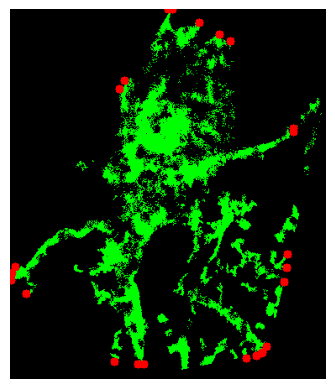

[array([405,   0], dtype=int32), array([430, 215], dtype=int32), array([430, 219], dtype=int32), array([427, 224], dtype=int32), array([424, 227], dtype=int32), array([418, 229], dtype=int32), array([196, 281], dtype=int32), array([190, 282], dtype=int32), array([186, 282], dtype=int32), array([ 23, 267], dtype=int32), array([ 21, 266], dtype=int32), array([ 18, 263], dtype=int32), array([ 18, 254], dtype=int32), array([ 89, 149], dtype=int32), array([271,   7], dtype=int32), array([276,   4], dtype=int32), array([388,   0], dtype=int32)]


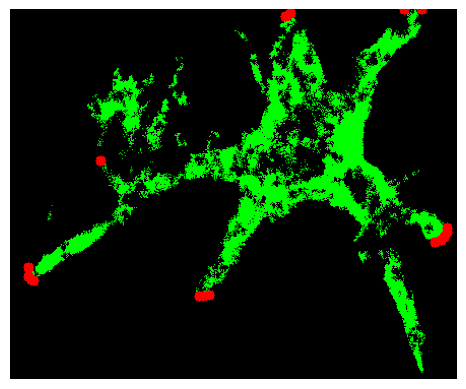

[array([270,   1], dtype=int32), array([316,  12], dtype=int32), array([324,  15], dtype=int32), array([440,  84], dtype=int32), array([442,  94], dtype=int32), array([442,  99], dtype=int32), array([441, 103], dtype=int32), array([438, 110], dtype=int32), array([436, 113], dtype=int32), array([211, 376], dtype=int32), array([208, 379], dtype=int32), array([199, 385], dtype=int32), array([194, 388], dtype=int32), array([190, 389], dtype=int32), array([186, 389], dtype=int32), array([167, 380], dtype=int32), array([163, 378], dtype=int32), array([160, 376], dtype=int32), array([159, 374], dtype=int32), array([159, 370], dtype=int32), array([211,   7], dtype=int32), array([212,   3], dtype=int32), array([266,   1], dtype=int32)]


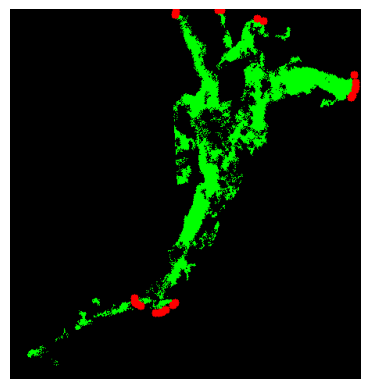

[array([173, 110], dtype=int32), array([178, 111], dtype=int32), array([301, 168], dtype=int32), array([306, 171], dtype=int32), array([308, 173], dtype=int32), array([313, 180], dtype=int32), array([313, 184], dtype=int32), array([275, 299], dtype=int32), array([258, 322], dtype=int32), array([252, 329], dtype=int32), array([247, 331], dtype=int32), array([ 35, 351], dtype=int32), array([ 30, 351], dtype=int32), array([  3, 348], dtype=int32), array([  0, 347], dtype=int32), array([  0, 340], dtype=int32), array([152, 118], dtype=int32), array([168, 110], dtype=int32)]


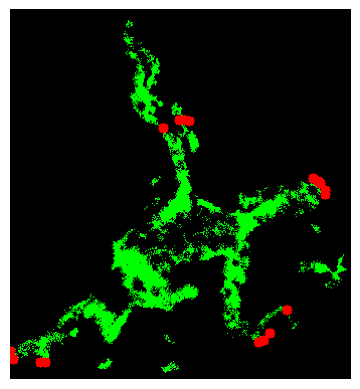

[array([211,   0], dtype=int32), array([219,   2], dtype=int32), array([228,   5], dtype=int32), array([229,   6], dtype=int32), array([393, 537], dtype=int32), array([393, 541], dtype=int32), array([353, 582], dtype=int32), array([348, 585], dtype=int32), array([ 93, 631], dtype=int32), array([ 89, 631], dtype=int32), array([ 85, 630], dtype=int32), array([ 82, 628], dtype=int32), array([ 80, 626], dtype=int32), array([ 16, 549], dtype=int32), array([ 15, 544], dtype=int32), array([ 15, 536], dtype=int32), array([130, 187], dtype=int32), array([198,  13], dtype=int32), array([206,   0], dtype=int32)]


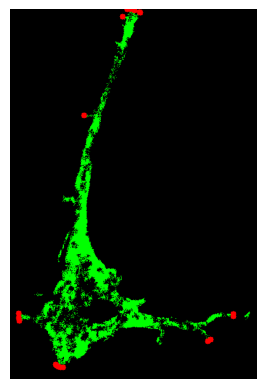

[array([116,   0], dtype=int32), array([120,   1], dtype=int32), array([340,  99], dtype=int32), array([343, 101], dtype=int32), array([453, 263], dtype=int32), array([453, 267], dtype=int32), array([451, 271], dtype=int32), array([449, 273], dtype=int32), array([440, 279], dtype=int32), array([ 80, 387], dtype=int32), array([ 76, 387], dtype=int32), array([ 12, 190], dtype=int32), array([ 12, 183], dtype=int32), array([49, 55], dtype=int32), array([51, 52], dtype=int32), array([57, 46], dtype=int32), array([107,   0], dtype=int32)]


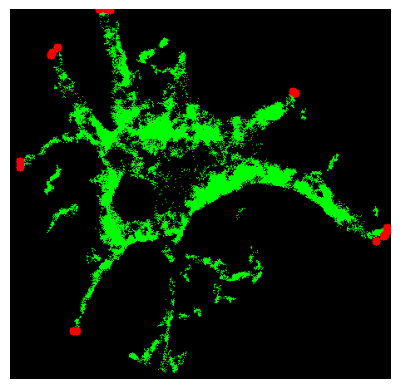

[array([380,   0], dtype=int32), array([578,  77], dtype=int32), array([580,  78], dtype=int32), array([580,  84], dtype=int32), array([579,  86], dtype=int32), array([480, 238], dtype=int32), array([475, 242], dtype=int32), array([204, 290], dtype=int32), array([ 36, 301], dtype=int32), array([ 31, 301], dtype=int32), array([ 23, 300], dtype=int32), array([ 18, 288], dtype=int32), array([ 18, 284], dtype=int32), array([ 39, 168], dtype=int32), array([ 46, 140], dtype=int32), array([ 48, 134], dtype=int32), array([ 49, 132], dtype=int32), array([369,   0], dtype=int32)]


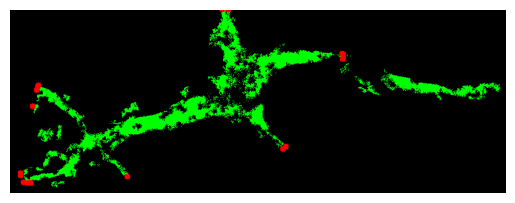

[array([245,   0], dtype=int32), array([602,  54], dtype=int32), array([604,  55], dtype=int32), array([605,  56], dtype=int32), array([605,  69], dtype=int32), array([604,  71], dtype=int32), array([447, 277], dtype=int32), array([445, 279], dtype=int32), array([394, 309], dtype=int32), array([386, 309], dtype=int32), array([198, 202], dtype=int32), array([191, 186], dtype=int32), array([185, 106], dtype=int32), array([185, 101], dtype=int32), array([239,   0], dtype=int32)]


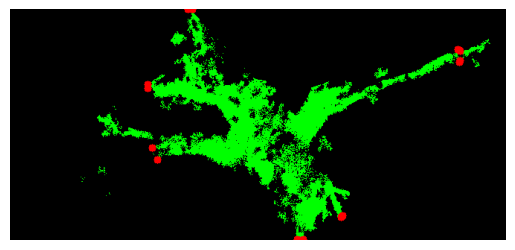

[array([137,   7], dtype=int32), array([144,  10], dtype=int32), array([178,  29], dtype=int32), array([338, 154], dtype=int32), array([343, 163], dtype=int32), array([343, 167], dtype=int32), array([320, 366], dtype=int32), array([319, 370], dtype=int32), array([283, 395], dtype=int32), array([279, 397], dtype=int32), array([267, 401], dtype=int32), array([233, 406], dtype=int32), array([228, 406], dtype=int32), array([ 72, 296], dtype=int32), array([ 53, 271], dtype=int32), array([ 46, 243], dtype=int32), array([ 46, 239], dtype=int32), array([124,  13], dtype=int32), array([126,  11], dtype=int32), array([130,   8], dtype=int32), array([133,   7], dtype=int32)]


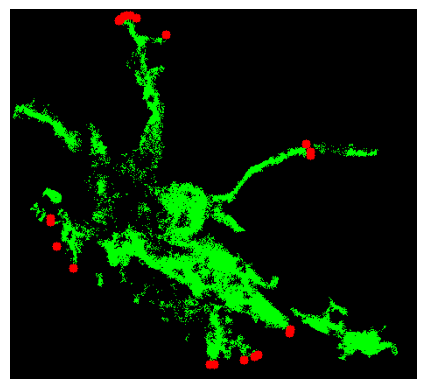

[array([208,   0], dtype=int32), array([221,   5], dtype=int32), array([428, 236], dtype=int32), array([429, 239], dtype=int32), array([429, 248], dtype=int32), array([426, 251], dtype=int32), array([323, 300], dtype=int32), array([176, 351], dtype=int32), array([172, 351], dtype=int32), array([ 19, 329], dtype=int32), array([ 10, 325], dtype=int32), array([ 10, 321], dtype=int32), array([ 36, 274], dtype=int32), array([188,   1], dtype=int32), array([196,   0], dtype=int32)]


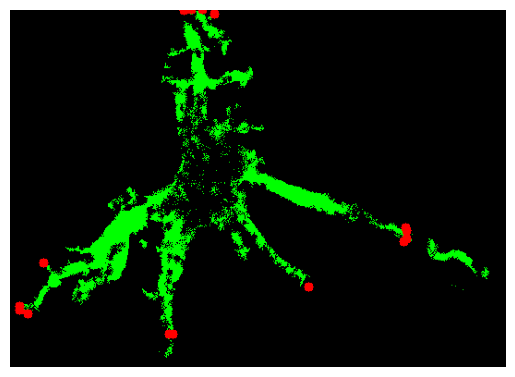

[array([ 97, 166], dtype=int32), array([429, 397], dtype=int32), array([433, 406], dtype=int32), array([435, 421], dtype=int32), array([435, 426], dtype=int32), array([ 76, 580], dtype=int32), array([ 69, 580], dtype=int32), array([ 68, 579], dtype=int32), array([ 67, 577], dtype=int32), array([ 60, 228], dtype=int32), array([ 60, 219], dtype=int32), array([ 67, 192], dtype=int32), array([ 70, 187], dtype=int32), array([ 75, 179], dtype=int32), array([ 90, 168], dtype=int32), array([ 93, 166], dtype=int32)]


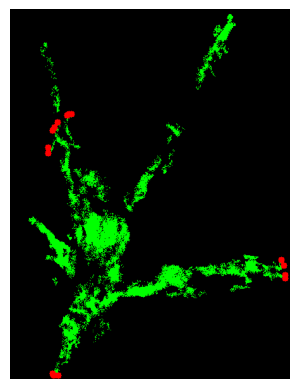

In [10]:
thick_dir = 'Lipachev_2024.03.16_astrocytes_examples/Lipachev_2024.02.27_astrocytes-test-thick'
for file in glob.glob(os.path.join(thick_dir, '*.tif')):
    img = cv2.imread(file)
    endings_points, img_endings = get_endings(img)
    print(endings_points)
    plt.imshow(img_endings)
    plt.axis('off')
    plt.show()

In [5]:
# image = cv2.imread('2022.05.25_3s_4.1_Image 1_z23_ch2-coloc_method-Mean_part-All.tif')
# plt.imshow(image)
# plt.axis('off')
# plt.show()

# # print(image)

# b, g, r = cv2.split(image)
# binary_image = np.where(g == 255, 255, 0).astype(np.uint8)

# # plt.imshow(binary_image, cmap='gray')
# # plt.axis('off')
# # plt.show()

# contours, hierarchy = cv2.findContours(cv2.dilate(binary_image, np.ones((5, 5), np.uint8) , iterations=1), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours1 = max(contours, key=lambda x: cv2.contourArea(x))
# cv2.drawContours(image, [contours1], -1, (255,255,0), 2)

# plt.imshow(image)
# plt.axis('off')
# plt.show()

# # x, y, w, h = cv2.boundingRect(contours1)
# # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 0)
# hull = cv2.convexHull(contours1)
# # print('...', hull)
# cv2.drawContours(image, [hull], 0, (0, 0, 255), 2)
# for h in hull:
#     print('ending', h[0])
#     cv2.circle(image, h[0], 5, [255, 0, 0], -1)

# plt.imshow(image)
# plt.axis('off')
# plt.show()


In [6]:
# cv2.__version__